In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization, Activation
from sklearn.model_selection import train_test_split


In [2]:
df = pd.read_csv('Dataset/FER2013/FER2013.csv')

In [3]:
EMOTIONS = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

In [4]:
df.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [5]:
print(df['Usage'].value_counts())

Usage
Training       28709
PublicTest      3589
PrivateTest     3589
Name: count, dtype: int64


In [6]:
#check for missing values
print(df.isnull().sum())

emotion    0
pixels     0
Usage      0
dtype: int64


In [7]:
#emotion count
print(df['emotion'].value_counts())

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64


In [8]:
np.array(df.pixels.loc[0].split(' ')).reshape(48,48)

array([['70', '80', '82', ..., '52', '43', '41'],
       ['65', '61', '58', ..., '56', '52', '44'],
       ['50', '43', '54', ..., '49', '56', '47'],
       ...,
       ['91', '65', '42', ..., '72', '56', '43'],
       ['77', '82', '79', ..., '105', '70', '46'],
       ['77', '72', '84', ..., '106', '109', '82']], dtype='<U3')

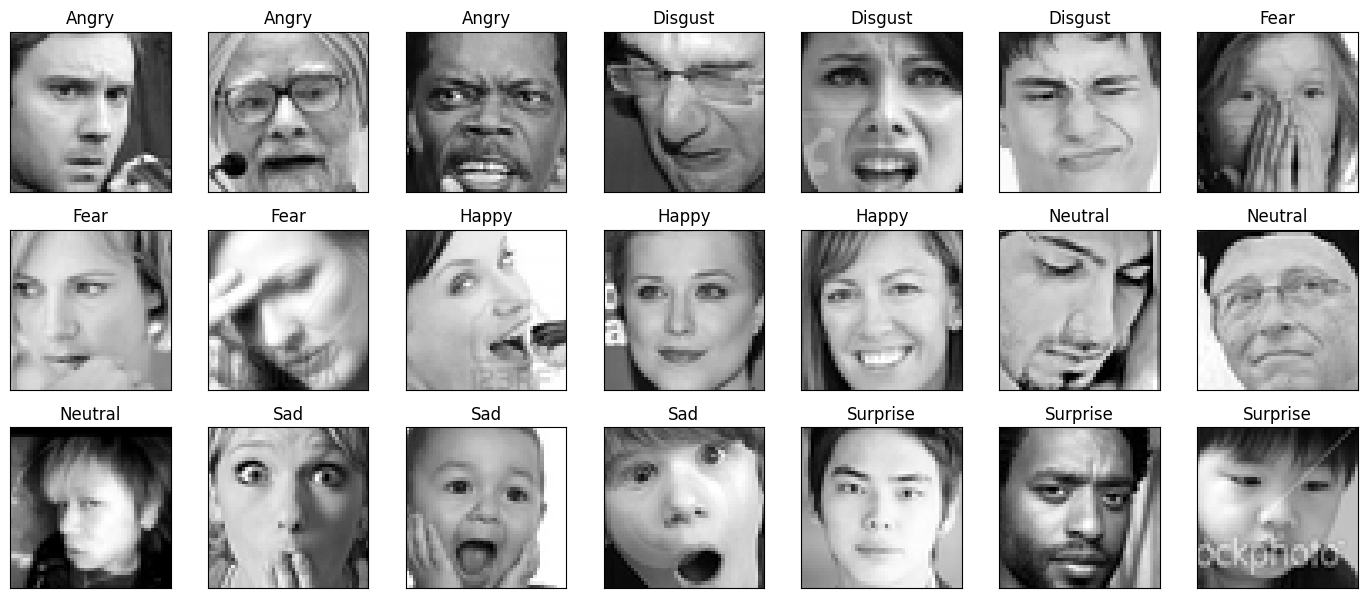

In [9]:
fig = plt.figure(1, (14, 14))
k = 0
for label in sorted(df.emotion.unique()):
    for j in range(3):
        px = df[df.emotion == label].pixels.iloc[k]
        px = np.array(px.split(' ')).reshape(48, 48).astype('float32')
        k += 1
        ax = plt.subplot(7, 7, k)
        ax.imshow(px, cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(EMOTIONS[label])
        plt.tight_layout()

In [10]:
img_array = df.pixels.apply(lambda x: np.array(x.split(' ')).reshape(48, 48, 1).astype('float32'))

In [11]:
img_array = np.stack(img_array, axis=0)

In [12]:
labels = df.emotion.values

In [13]:
X_train,X_test,y_train,y_test = train_test_split(img_array, labels, test_size=0.1)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32298, 48, 48, 1), (3589, 48, 48, 1), (32298,), (3589,))

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [16]:
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001)
loss= 'sparse_categorical_crossentropy'

In [17]:
#layer 1
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3),input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(128,(3,3),input_shape=(48,48,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))

opt = tf.keras.optimizers.RMSprop(learning_rate = 0.0001)

model.compile(optimizer=opt,loss=loss,metrics=['accuracy'])

model.summary()

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 46, 46, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 23, 23, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 21, 21, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,743 (1.36 MB)

 Trainable params: 356,295 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [18]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    verbose=1,
)

Epoch 1/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 0.3283 - loss: 1.7860 - val_accuracy: 0.4455 - val_loss: 1.4509
Epoch 2/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.5027 - loss: 1.3278 - val_accuracy: 0.4645 - val_loss: 1.3955
Epoch 3/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.5624 - loss: 1.1642 - val_accuracy: 0.5082 - val_loss: 1.3058
Epoch 4/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.6210 - loss: 1.0397 - val_accuracy: 0.5294 - val_loss: 1.2769
Epoch 5/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.6701 - loss: 0.9201 - val_accuracy: 0.5336 - val_loss: 1.2984
Epoch 6/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.7135 - loss: 0.8231 - val_accuracy: 0.5405 - val_loss: 1.2840
Epoch 7/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.7521 - loss: 0.7316 - val_accuracy: 0.5347 - val_loss: 1.3235
Epoch 8/50
1010/1010 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.7878 -

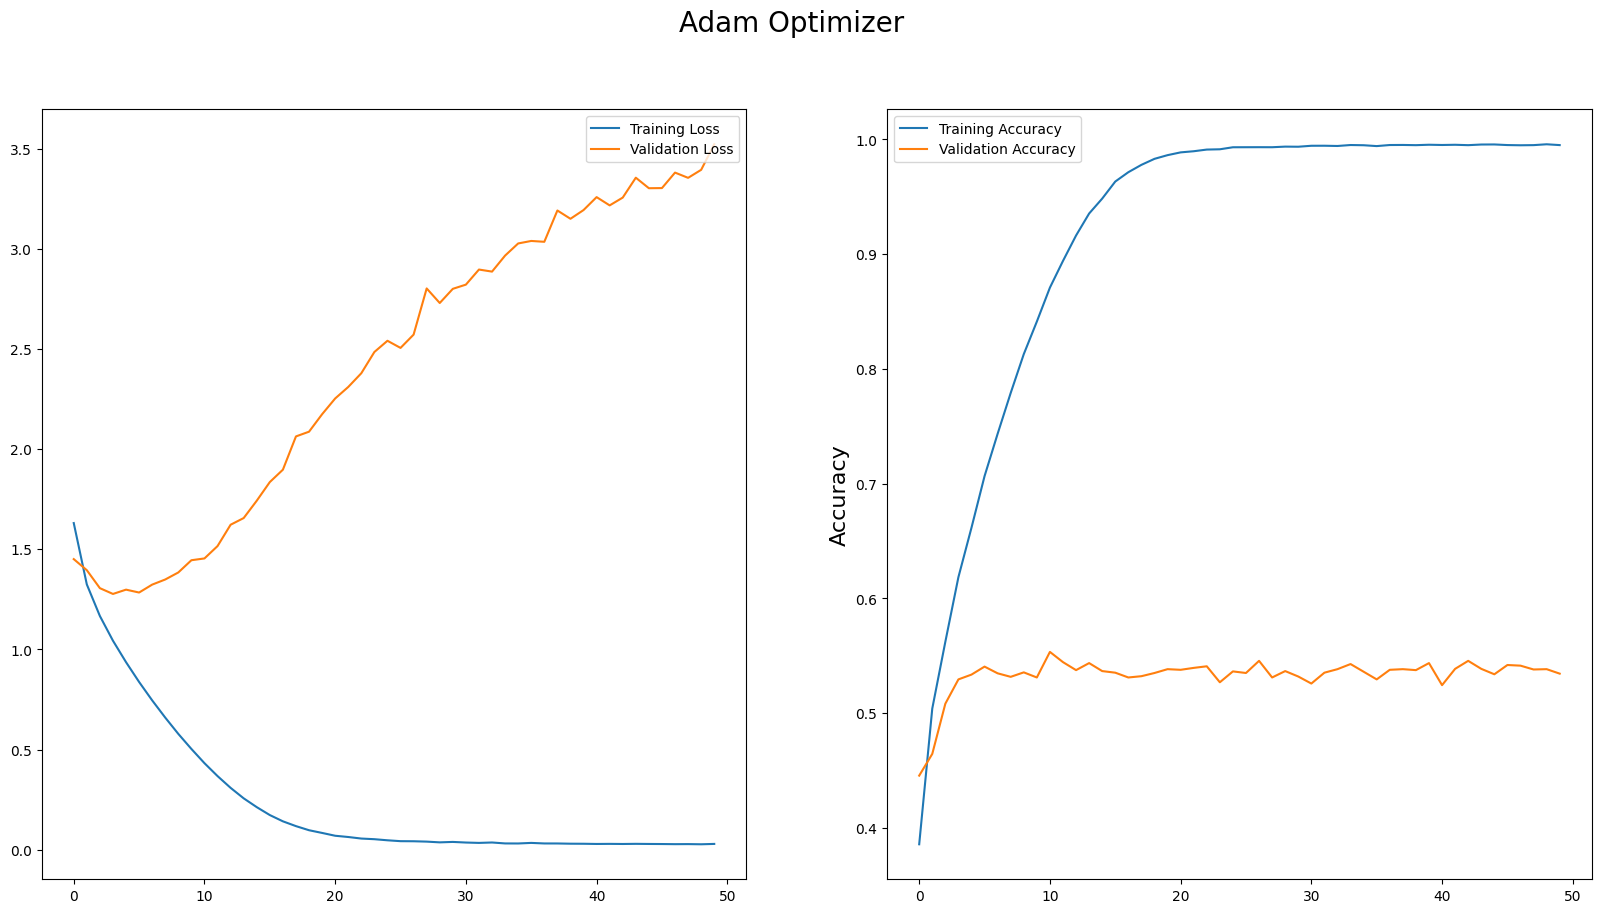

In [19]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.suptitle('Adam Optimizer',fontsize=20)
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend(loc='upper right')
plt.subplot(1,2,2)
plt.ylabel("Accuracy",fontsize=16)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label = 'Validation Accuracy')
plt.legend()
plt.show()

113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


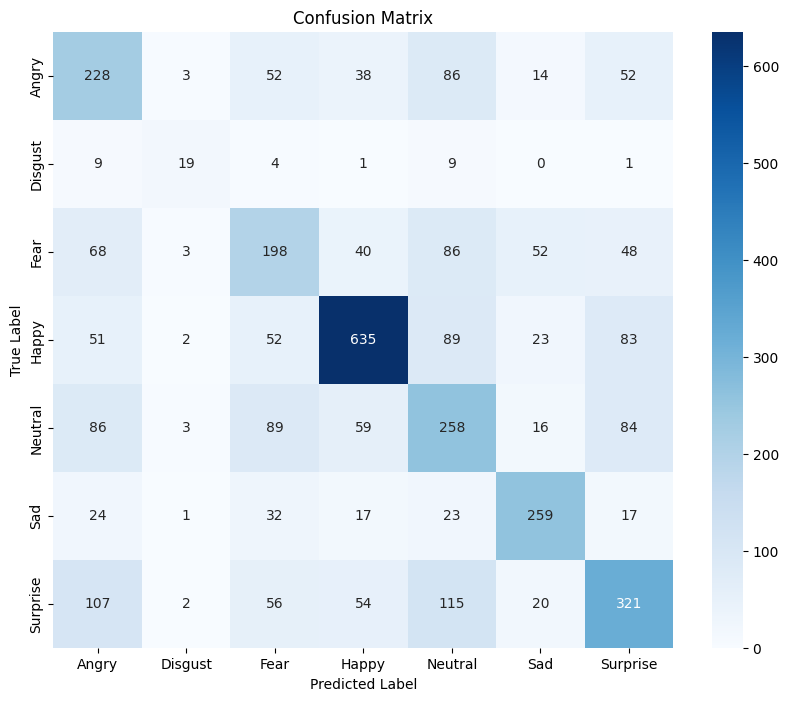

              precision    recall  f1-score   support

       Angry       0.40      0.48      0.44       473
     Disgust       0.58      0.44      0.50        43
        Fear       0.41      0.40      0.40       495
       Happy       0.75      0.68      0.71       935
     Neutral       0.39      0.43      0.41       595
         Sad       0.67      0.69      0.68       373
    Surprise       0.53      0.48      0.50       675

    accuracy                           0.53      3589
   macro avg       0.53      0.52      0.52      3589
weighted avg       0.55      0.53      0.54      3589



In [21]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
cm_df = pd.DataFrame(cm, index=EMOTIONS, columns=EMOTIONS)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Classification Report
report = classification_report(y_true, y_pred_classes, target_names=EMOTIONS)
print(report)

In [22]:
#save model
model.save('model.h5')